In [7]:
import torch

In [8]:
# arange(n): vector of evenly spaced values
# stored in main memory and designated for CPU-based computations
x = torch.arange(12, dtype=torch.float32)
x

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [9]:
# number of elements
x.numel()

12

In [10]:
x.shape

torch.Size([12])

In [11]:
X = x.reshape(3,4)
X

# equivalent to call x.reshape(-1,4) or x.reshape(3,-1)

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

In [12]:
torch.zeros((2,3,4))
# or torch.ones for all ones

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [13]:
# drawn from std Gaussian distri.
torch.randn(3,4)

tensor([[-2.6558,  0.1849, -1.9788,  1.0563],
        [ 1.4518, -0.6025,  0.7315, -0.9843],
        [ 0.4815,  1.5975, -1.2615,  1.1198]])

In [14]:
# designated tensor (n dimensional array)
torch.tensor([[1,2,3],[4,5,6]])

tensor([[1, 2, 3],
        [4, 5, 6]])

In [15]:
# last one
X[-1]

tensor([ 8.,  9., 10., 11.])

In [16]:
# from first row to the second row (3 not included)
X[1:3]

tensor([[ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

In [17]:
X[1,2] = 17
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5., 17.,  7.],
        [ 8.,  9., 10., 11.]])

In [18]:
x

tensor([ 0.,  1.,  2.,  3.,  4.,  5., 17.,  7.,  8.,  9., 10., 11.])

In [19]:
torch.exp(x)

tensor([1.0000e+00, 2.7183e+00, 7.3891e+00, 2.0086e+01, 5.4598e+01, 1.4841e+02,
        2.4155e+07, 1.0966e+03, 2.9810e+03, 8.1031e+03, 2.2026e+04, 5.9874e+04])

In [20]:
X = torch.arange(12, dtype=torch.float32).reshape((3,4))
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
print(X)
print(Y)
torch.cat((X, Y), dim=0), torch.cat((X, Y), dim=1)

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])
tensor([[2., 1., 4., 3.],
        [1., 2., 3., 4.],
        [4., 3., 2., 1.]])


(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

In [21]:
X == Y

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])

In [22]:
X.sum()

tensor(66.)

In [23]:
a = torch.arange(3).reshape((3, 1))
b = torch.arange(2).reshape((1, 2))
a, b

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]))

In [24]:
# broadcasting: replicate a for columns, and add b correspondingly
a + b

tensor([[0, 1],
        [1, 2],
        [2, 3]])

In [25]:
before = id(Y)
Y = Y + X
id(Y) == before

False

This is bad because we want the operation be done **in place** to save memory.

In [26]:
Z = torch.zeros_like(Y)
print('id(Z):', id(Z))
Z[:] = X + Y
print('id(Z):', id(Z))
# this is good

id(Z): 2275909254848
id(Z): 2275909254848


In [27]:
before = id(X)
X += Y
id(X) == before
# this also good

True

In [28]:
A = X.numpy()
B = torch.from_numpy(A)
type(A), type(B)

(numpy.ndarray, torch.Tensor)

In [29]:
a = torch.tensor([1.5])
a.item()
# convert to python scalar

1.5

In [30]:
import os
import pandas as pd

os.makedirs(os.path.join('..', 'data'), exist_ok=True)
data_file = os.path.join('..', 'data', 'house_tiny.csv')
with open(data_file, 'w') as f:
    f.write('''NumRooms,RoofType,Price
NA,NA,127500
2,NA,106000
4,Slate,178100
NA,NA,140000''')
    

data = pd.read_csv(data_file)
print(data)

   NumRooms RoofType   Price
0       NaN      NaN  127500
1       2.0      NaN  106000
2       4.0    Slate  178100
3       NaN      NaN  140000


In [31]:
inputs, target = data.iloc[:,0:2], data.iloc[:,2]
inputs = pd.get_dummies(inputs, dummy_na=True)
print(inputs)

   NumRooms  RoofType_Slate  RoofType_nan
0       NaN           False          True
1       2.0           False          True
2       4.0            True         False
3       NaN           False          True


In [32]:
inputs = inputs.fillna(inputs.mean())
inputs

,NumRooms,RoofType_Slate,RoofType_nan
0,3.0,False,True
1,2.0,False,True
2,4.0,True,False
3,3.0,False,True


In [33]:
X = torch.tensor(inputs.to_numpy(dtype=float))
y = torch.tensor(target.to_numpy(dtype=float))
X, y

(tensor([[3., 0., 1.],
         [2., 0., 1.],
         [4., 1., 0.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500., 106000., 178100., 140000.], dtype=torch.float64))

In [ ]:
# tensor scalar
x = torch.tensor(3.0)
y = torch.tensor(2.0)

x + y, x * y, x / y, x**y

(tensor(5.), tensor(6.), tensor(1.5000), tensor(9.))

In [ ]:
A = torch.arange(6, dtype=torch.float32).reshape(2, 3)
B = A.clone()  # Assign a copy of A to B by allocating new memory

A * B  # element-wise product aka Hadamard Product

tensor([[ 0.,  1.,  4.],
        [ 9., 16., 25.]])

In [ ]:
A.sum(axis=0)

tensor([3., 5., 7.])

Be noticed that even though axis=0 means rows, it doesn't mean to sum along the rows, but let the result of sum be the same dimension of a row.

In [41]:
A.sum(axis=[0, 1]) == A.sum()  # Same as A.sum()

tensor(True)

In [42]:
A.mean(), A.sum() / A.numel()

(tensor(2.5000), tensor(2.5000))

In [43]:
A.mean(axis=0), A.sum(axis=0) / A.shape[0]

(tensor([1.5000, 2.5000, 3.5000]), tensor([1.5000, 2.5000, 3.5000]))

In [44]:
sum_A = A.sum(axis=1, keepdim=True)
sum_A

tensor([[ 3.],
        [12.]])

In [47]:
A / sum_A
# each row sums up to 1

tensor([[0.0000, 0.3333, 0.6667],
        [0.2500, 0.3333, 0.4167]])

In [ ]:
A.cumsum(axis=0)
# row by row, cumulated by columns

tensor([[0., 1., 2.],
        [3., 5., 7.]])

In [51]:
x = torch.arange(3, dtype=torch.float32)
torch.mv(A, x), A @ x

(tensor([ 5., 14.]), tensor([ 5., 14.]))

In [52]:
B = torch.ones(3, 4)
torch.mm(A, B), A@B

(tensor([[ 3.,  3.,  3.,  3.],
         [12., 12., 12., 12.]]),
 tensor([[ 3.,  3.,  3.,  3.],
         [12., 12., 12., 12.]]))

In [ ]:
# l2 norm, ||x||2 = sqrt(sum(x ** 2))
u = torch.tensor([3.0, -4.0])
torch.norm(u)

tensor(5.)

In [54]:
# l1 norm, ||x||1 = sum(abs(x))
torch.abs(u).sum()

tensor(7.)

l_p norms: ||x||_p = (sum(abs(x_i)^p)) ** (1 / p)

In [72]:
# Frobenius norm: l2 norm of matrices
torch.norm(A), A, 55 ** 0.5

(tensor(7.4162),
 tensor([[0., 1., 2.],
         [3., 4., 5.]]),
 7.416198487095663)

In [ ]:
import numpy as np

np.linalg.norm(torch.ones((2,3,4,5)))

(10.954452, 10.954451150103322)

In [96]:
import numpy as np
from matplotlib_inline import backend_inline
import matplotlib.pyplot as plt

In [99]:
def use_svg_display():  #@save
    """Use the svg format to display a plot in Jupyter."""
    backend_inline.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5, 2.5)):  #@save
    """Set the figure size for matplotlib."""
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize

#@save
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """Set the axes for matplotlib."""
    axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
    axes.set_xscale(xscale), axes.set_yscale(yscale)
    axes.set_xlim(xlim),     axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

#@save
def plot(X, Y=None, xlabel=None, ylabel=None, legend=[], xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """Plot data points."""

    def has_one_axis(X):  # True if X (tensor or list) has 1 axis
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

    if has_one_axis(X): X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)

    set_figsize(figsize)
    if axes is None:
        axes = plt.gca()
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        axes.plot(x,y,fmt) if len(x) else axes.plot(y,fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)


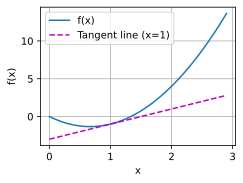

In [100]:
def f(x):
    return 3 * x ** 2 - 4 * x

x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])


Nowadays we use backpropagation that applies chain rule to calculate gradient. "As we pass data through each successive function, the framework builds a computational graph that tracks how each value depends on others. To calculate derivatives, automatic differentiation works backwards through this graph applying the chain rule."

In [118]:
x = torch.arange(4.0)
x.requires_grad_(True)
print(x.grad)

None


In [119]:
y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

In [ ]:
y.backward()
print(x.grad)

tensor([ 0.,  4.,  8., 12.])


In [127]:
8171.42 * 1 + 8171.43 * 6

57200.0